In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_salary=pd.read_csv("Salary_Data.csv")

In [3]:
df_salary.head(4)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525


In [5]:
df_salary.describe()

,YearsExperience,Salary
count,42.000000,42.000000
mean,6.207143,84779.214286
std,2.926364,27876.701401
min,1.100000,37731.000000
25%,3.925000,57929.250000
50%,6.000000,91738.000000
75%,8.700000,109431.000000
max,11.500000,130987.000000


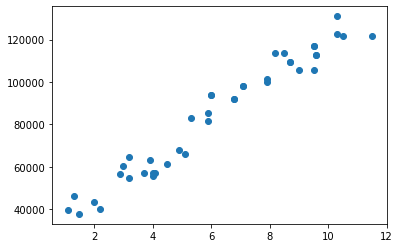

In [7]:
plt.scatter(df_salary['YearsExperience'],df_salary['Salary'])

In [14]:
x=df_salary.iloc[:,:-1].values
y=df_salary.iloc[:,-1].values


In [67]:
x.transpose()

array([[ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5,  5.9,  6. ,  6.8,
         7.1,  7.9,  8.5,  8.7,  9.5,  9.5,  9.6, 10.3, 11.5]])

In [17]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872,  85300,  93940,
        91738,  98273, 100098, 113812, 109431, 105582, 116969, 112635,
       130987, 121872], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

In [69]:
X_train.transpose()

array([[ 8.7,  8.7,  7.1,  3.9,  9.5,  6.8,  1.5,  7.9,  9. ,  9.6,  4.9,
         6. ,  9.6,  3.2,  4. ,  2.9,  4.5,  1.1, 10.3,  2.2,  4.1,  3.7,
        10.3,  8.2,  3. ,  5.3,  4. ,  6. ]])

In [31]:
y_train

array([109431, 109431,  98273,  63218, 105582,  91738,  37731, 101302,
       105582, 112635,  67938,  93940, 112635,  64445,  56957,  56642,
        61111,  39343, 122391,  39891,  57081,  57189, 130987, 113812,
        60150,  83088,  55794,  93940], dtype=int64)

In [68]:
X_test.transpose()

array([[ 1.3,  9.5,  6.8,  5.1, 10.5,  2. ,  7.1,  9.5,  5.9,  5.9,  7.9,
         8.5, 11.5,  3.2]])

In [33]:
y_test

array([ 46205, 116969,  91738,  66029, 121872,  43525,  98273, 116969,
        81363,  85300, 100098, 113812, 121872,  54445], dtype=int64)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
pred=lr.predict(X_test)

In [37]:
pred

array([ 38046.62257993, 116310.53350314,  90540.70917477,  74315.26422727,
       125854.91288402,  44727.68814655,  93404.02298903, 116310.53350314,
        81950.76773197,  81950.76773197, 101039.52649373, 106766.15412226,
       135399.2922649 ,  56180.9434036 ])

In [43]:
y_test

array([ 46205, 116969,  91738,  66029, 121872,  43525,  98273, 116969,
        81363,  85300, 100098, 113812, 121872,  54445], dtype=int64)

In [45]:
diff_lr=y_test-pred
diff_lr

array([  8158.37742007,    658.46649686,   1197.29082523,  -8286.26422727,
        -3982.91288402,  -1202.68814655,   4868.97701097,    658.46649686,
         -587.76773197,   3349.23226803,   -941.52649373,   7045.84587774,
       -13527.2922649 ,  -1735.9434036 ])

In [47]:
res_df=pd.concat([pd.Series(pred),pd.Series(y_test),pd.Series(diff_lr)],axis=1)
res_df.columns=['Prediction','Original Data','Diff']

In [51]:
res_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Prediction,38046.62258,116310.533503,90540.709175,74315.264227,125854.912884,44727.688147,93404.022989,116310.533503,81950.767732,81950.767732,101039.526494,106766.154122,135399.292265,56180.943404
Original Data,46205.00000,116969.000000,91738.000000,66029.000000,121872.000000,43525.000000,98273.000000,116969.000000,81363.000000,85300.000000,100098.000000,113812.000000,121872.000000,54445.000000
Diff,8158.37742,658.466497,1197.290825,-8286.264227,-3982.912884,-1202.688147,4868.977011,658.466497,-587.767732,3349.232268,-941.526494,7045.845878,-13527.292265,-1735.943404


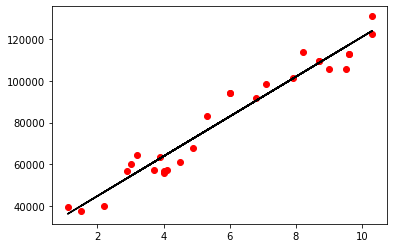

In [55]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lr.predict(X_train),color='black')

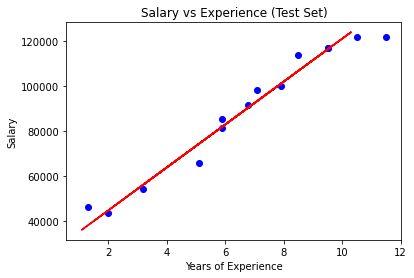

In [57]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [60]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,pred))
R2=metrics.r2_score(y_test,pred)

In [61]:
rmse

5520.308796902157

# Model Accuracy


In [62]:
R2


0.9583364339032916

In [63]:
lr.predict([[3.9]])

array([62862.00897022])

In [65]:
f=input("Enter the Years of Experience=")
print("The expected Salary is",lr.predict([[f]]))

Enter the Years of Experience=7.9
The expected Salary is [101039.52649373]


T:\anaconda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
